## Example 1 - Creating a Simple Linear Regression

### Importing the libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.datasets import make_regression

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from math import sqrt

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.formula.api import ols
import statsmodels.api as sm

## Example 4 - Decision Tree

### Importing the libraries

In [37]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn import metrics  

### Loading the dataset

In [38]:
petrol_data = pd.read_csv('petrol_consumption.csv')  
petrol_data.head(3)  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [39]:
petrol_data.describe()  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


### Creating the Train and Test Datasets

In [40]:
# Creating X and Y values
X = petrol_data.drop('Petrol_Consumption', axis=1)  
y = petrol_data['Petrol_Consumption']  

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

In [41]:
# Checking the size of the train and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 4), (10, 4), (38,), (10,))

### Building the Regression Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor  
decision_regressor = DecisionTreeRegressor()  
decision_regressor.fit(X_train, y_train)  

DecisionTreeRegressor()

### Checking Prediction Accuracy

In [43]:
# Train Dataset
y_pred_train = decision_regressor.predict(X_train)
result_df_train = pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_train})  
result_df_train.head(3)  

,Actual,Predicted
11,471,471.0
31,554,554.0
33,628,628.0


In [44]:
# Test Dataset
y_pred_test = decision_regressor.predict(X_test)
result_df_test = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})  
result_df_test.head(3)  

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,574.0


In [45]:
tree_train_MAE = metrics.mean_absolute_error(y_train, y_pred_train)
tree_test_MAE = metrics.mean_absolute_error(y_test, y_pred_test)
tree_train_MSE = metrics.mean_squared_error(y_train, y_pred_train)
tree_test_MSE = metrics.mean_squared_error(y_test, y_pred_test)
tree_train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
tree_test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [46]:
print('Train Mean Absolute Error:',tree_train_MAE)
print('Test Mean Absolute Error:', tree_test_MAE)  
print('')

print('Train Mean Squared Error:', tree_train_MSE) 
print('Test Mean Squared Error:', tree_test_MSE)  
print('')

print('Train Root Mean Squared Error:', tree_train_RMSE)  
print('Test Root Mean Squared Error:', tree_test_RMSE)

Train Mean Absolute Error: 0.0
Test Mean Absolute Error: 58.2

Train Mean Squared Error: 0.0
Test Mean Squared Error: 6350.2

Train Root Mean Squared Error: 0.0
Test Root Mean Squared Error: 79.68814215427537


The mean absolute error for our algorithm is 50.9, which is less than 10 percent of the mean of all the values in the 'Petrol_Consumption' column. 

This means that our algorithm did a fine prediction job.

However, the errors in the train dataset predictions are 0. This suggests the presence of overfitting. 

### Plotting the Decision Tree

In [47]:
from sklearn.tree import plot_tree

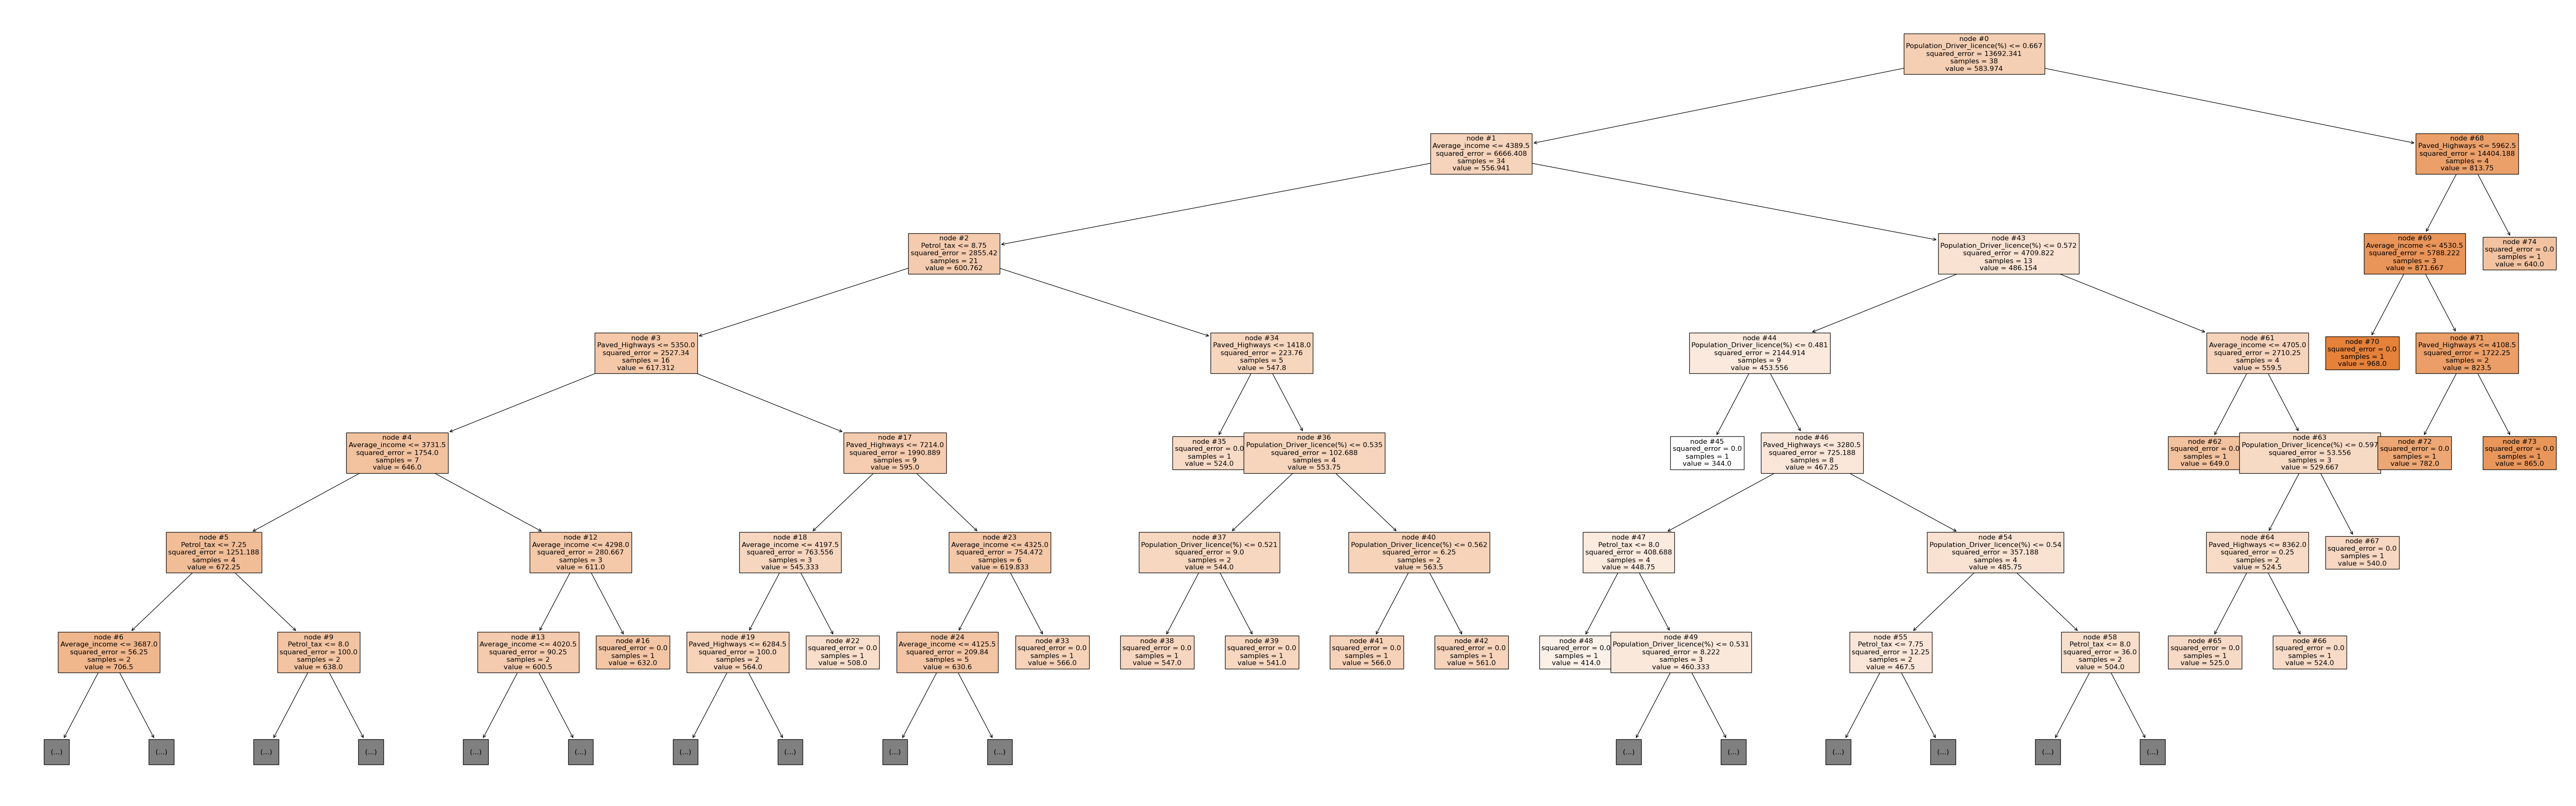

In [48]:
features = list(X.columns)

plt.figure(figsize=(80,25))
plot_tree(decision_regressor, max_depth=6, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

We can copy the above image and paste it into another software, such as paint, to have a zoomed view.

### Feature Importance 

In [49]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

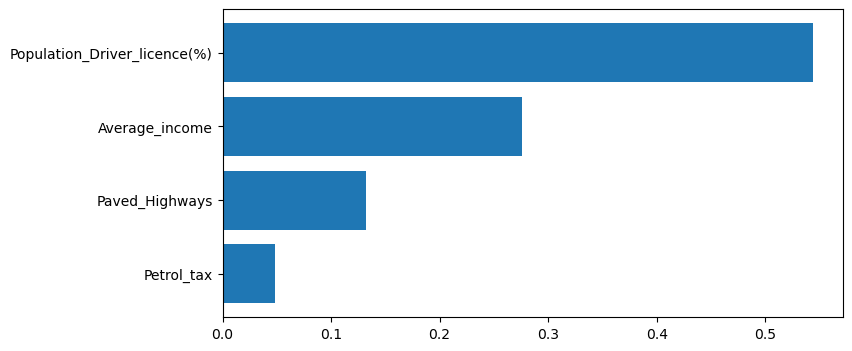

In [50]:
importances = decision_regressor.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=True)
plt.figure(figsize=(8,4))
plt.barh(importance_df.index, importance_df.Importance)

Population_Driver_licence(%) is the most important feature

## Example 5 - Random Forest

### Importing the libraries

In [51]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split  

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics  

### Preparing the data for modelling

In [52]:
# Loading the data
petrol_data = pd.read_csv('petrol_consumption.csv')  

# Creating X and y 
X = petrol_data.drop('Petrol_Consumption', axis=1)  
y = petrol_data['Petrol_Consumption']  

# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

### Building the model

In [53]:
# Create the model with 100 trees
randomForestModel = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Fit on training data
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Checking Prediction Accuracy

In [54]:
# Making predictions

rf_pred_train = randomForestModel.predict(X_train)
rf_pred_test = randomForestModel.predict(X_test)

In [55]:
rf_train_MAE = metrics.mean_absolute_error(y_train, rf_pred_train)
rf_test_MAE = metrics.mean_absolute_error(y_test, rf_pred_test)
rf_train_MSE = metrics.mean_squared_error(y_train, rf_pred_train)
rf_test_MSE = metrics.mean_squared_error(y_test, rf_pred_test)
rf_train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train))
rf_test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test))

In [56]:
print('Train Mean Absolute Error:',rf_train_MAE)
print('Test Mean Absolute Error:', rf_test_MAE)  
print('')

print('Train Mean Squared Error:', rf_train_MSE) 
print('Test Mean Squared Error:', rf_test_MSE)  
print('')

print('Train Root Mean Squared Error:', rf_train_RMSE)  
print('Test Root Mean Squared Error:', rf_test_RMSE)

Train Mean Absolute Error: 0.0
Test Mean Absolute Error: 55.1

Train Mean Squared Error: 0.0
Test Mean Squared Error: 5054.7

Train Root Mean Squared Error: 0.0
Test Root Mean Squared Error: 71.09641341164827


Here, we see overfitting in the random forest model as well.

### Feature Importance

In [57]:
feature_list = X_train.columns

In [58]:
# Get numerical feature importances
importances = list(randomForestModel.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Average_income       Importance: 0.29
Variable: Paved_Highways       Importance: 0.28
Variable: Population_Driver_licence(%) Importance: 0.28
Variable: Petrol_tax           Importance: 0.14


### New Random Forest Model

Can we improve the prediction accuracy by considering only the important features?

In [69]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 500, random_state=5)

# Extract the two most important features
important_indices = [feature_list[2], feature_list[1]]
train_important = X_train.loc[:, ['Paved_Highways','Average_income','Population_Driver_licence(%)']]
test_important = X_test.loc[:, ['Paved_Highways','Average_income','Population_Driver_licence(%)']]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  

Mean Absolute Error: 56.80640000000001
Mean Squared Error: 4410.0591032
Root Mean Squared Error: 66.40827586378072


MAE increased from 55.1 to 56.8.

MSE decreased from 5054 to 4410.

RMSE decreased from 71.1 to 66.4.

## Comparing Multiple Linear Regression, Decision Tree, and Random Forest

### Quickly Building a OLS model with petrol data

In [77]:
# Loading the data
petrol_data = pd.read_csv('petrol_consumption.csv')  

# Creating X and y 
X = petrol_data.drop('Petrol_Consumption', axis=1)  
y = petrol_data['Petrol_Consumption']  

# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

# Create the model
OLS_model = sm.OLS(y_train, X_train).fit()

# Generating predictions
y_pred_train = OLS_model.predict(X_train)
y_pred_test = OLS_model.predict(X_test)

In [80]:
OLS_train_MAE = metrics.mean_absolute_error(y_train, y_pred_train)
OLS_test_MAE = metrics.mean_absolute_error(y_test, y_pred_test)
OLS_train_MSE = metrics.mean_squared_error(y_train, y_pred_train)
OLS_test_MSE = metrics.mean_squared_error(y_test, y_pred_test)
OLS_train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
OLS_test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

### Multiple Regression Results

In [81]:
print('Train Mean Absolute Error:',OLS_train_MAE)
print('Test Mean Absolute Error:', OLS_test_MAE)  
print('')

print('Train Mean Squared Error:', OLS_train_MSE) 
print('Test Mean Squared Error:', OLS_test_MSE)  
print('')

print('Train Root Mean Squared Error:', OLS_train_RMSE)  
print('Test Root Mean Squared Error:', OLS_test_RMSE)

Train Mean Absolute Error: 52.48525221939775
Test Mean Absolute Error: 58.01696306732494

Train Mean Squared Error: 4336.068548626843
Test Mean Squared Error: 4492.950158508005

Train Root Mean Squared Error: 65.8488310346269
Test Root Mean Squared Error: 67.02947231261787


### Decision Tree Result

In [83]:
print('Train Mean Absolute Error:',tree_train_MAE)
print('Test Mean Absolute Error:', tree_test_MAE)  
print('')

print('Train Mean Squared Error:', tree_train_MSE) 
print('Test Mean Squared Error:', tree_test_MSE)  
print('')

print('Train Root Mean Squared Error:', tree_train_RMSE)  
print('Test Root Mean Squared Error:', tree_test_RMSE)

Train Mean Absolute Error: 0.0
Test Mean Absolute Error: 58.2

Train Mean Squared Error: 0.0
Test Mean Squared Error: 6350.2

Train Root Mean Squared Error: 0.0
Test Root Mean Squared Error: 79.68814215427537


### Random Forest Result

In [82]:
print('Train Mean Absolute Error:',rf_train_MAE)
print('Test Mean Absolute Error:', rf_test_MAE)  
print('')

print('Train Mean Squared Error:', rf_train_MSE) 
print('Test Mean Squared Error:', rf_test_MSE)  
print('')

print('Train Root Mean Squared Error:', rf_train_RMSE)  
print('Test Root Mean Squared Error:', rf_test_RMSE)

Train Mean Absolute Error: 0.0
Test Mean Absolute Error: 55.1

Train Mean Squared Error: 0.0
Test Mean Squared Error: 5054.7

Train Root Mean Squared Error: 0.0
Test Root Mean Squared Error: 71.09641341164827


There is overfitting in both the random forest model and the decision tree model.

As a result, multiple linear regression model yielded the best overall result.

However.

In [94]:
petrol_data.shape

(48, 5)

The dataset we are working with only have 48 observations. 

Model performance may change with larger datasets.

Feature Selection using decision tree has been covered with petroleum data.

Should the below section be kept as an additional example?

## Feature Selection using decision tree

In [70]:
feature_df = pd.read_csv('House_data.csv')
feature_df = feature_df.head(100)


In [71]:
feature_df['basement'] = (feature_df['sqft_basement'] > 0).astype(int)
feature_df['renovated'] = (feature_df['yr_renovated'] > 0).astype(int)
to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
feature_df.drop(to_drop, axis = 1, inplace = True)
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']
feature_df = pd.get_dummies(feature_df, columns = cat_cols, drop_first=True)




In [72]:
y = feature_df.iloc[:, 0].values
X = feature_df.iloc[:, 1:].values

In [73]:
#create a ExtraTreeClassifier
#Using ensemble learning–based ExtraTreeClassifier is one of the techniques to shortlist significant variables
#We can look at the respective p-values and shortlist the variables
#https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_

array([0.05138825, 0.05414674, 0.07435781, 0.06813634, 0.07248885,
       0.06739545, 0.07195298, 0.07445626, 0.0703486 , 0.07213266,
       0.07293161, 0.02669369, 0.00727287, 0.00184218, 0.00327559,
       0.01327378, 0.00461406, 0.00347163, 0.0273456 , 0.02446887,
       0.01346106, 0.00910525, 0.02351459, 0.02152008, 0.01378263,
       0.0075234 , 0.00326973, 0.01757332, 0.02252554, 0.00573058])

In [66]:
importances = tree_clf.feature_importances_
feature_names = feature_df.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
feature_imp_dir

{'bedrooms': 0.049618459601824504,
 'bathrooms': 0.05363538264344709,
 'sqft_living': 0.06826022788462391,
 'sqft_lot': 0.075609605277006,
 'sqft_above': 0.07513361104541028,
 'yr_built': 0.06857553267061824,
 'zipcode': 0.06833728360111489,
 'lat': 0.07539003303824911,
 'long': 0.07443006931796683,
 'sqft_living15': 0.07340628110776047,
 'sqft_lot15': 0.07314558700653376,
 'basement': 0.028175784560543732,
 'renovated': 0.006447658296029526,
 'waterfront_1': 0.0012259615545651926,
 'view_2': 0.004201180840982498,
 'view_3': 0.012052442989242667,
 'view_4': 0.005627602486363556,
 'condition_2': 0.003267646858620926,
 'condition_3': 0.02388998248783966,
 'condition_4': 0.02141275545223214,
 'condition_5': 0.012273907506948829,
 'grade_6': 0.008993406942548837,
 'grade_7': 0.024553896741813998,
 'grade_8': 0.019857462714649072,
 'grade_9': 0.01470457421941189,
 'grade_10': 0.005229734322016021,
 'grade_11': 0.002964274936863606,
 'floors_1.5': 0.020505358560083564,
 'floors_2.0': 0.02362

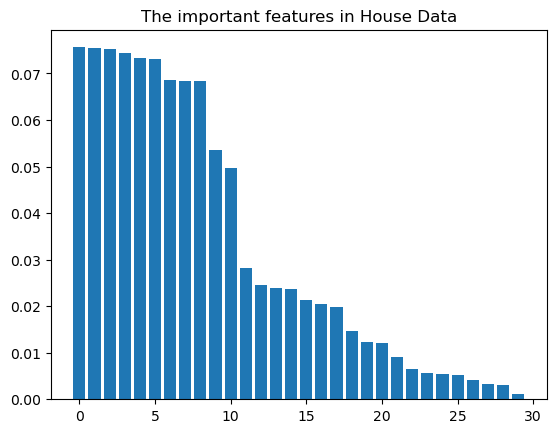

In [74]:
plt.bar(range(len(features)), [imp[1] for imp in features], align='center')
plt.title('The important features in House Data');

In [75]:
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

Total Features count: 30
Selected Features:  11


![](img/questions-01.png)